# ゼミ

    4月28日　太田　康之

## 報告内容
- 前回（4/15）の課題
    - amp_65パターンの比較
        - ノンパラメトリック検定
        - ウィルコクスン順位和検定
        - コルモゴロフ-スミルノフ検定
        - 適合度検定
        - 特異スペクトル変換法
            
            **井手・杉山,異常検知と変化検知,(2015) 部分空間法による変化検知**
           
         <!---img src = "image/book_ijoukenchi_henkakenchi_s.png" --->
         

## アドバイス頂きたいこと

- パターン抽出の手法について

    - 特異スペクトル変換法
<!--- img src ="image/fig_sindenzu_org.png" --->

<!--- img src ="image/fig_sindenzu_treat.png" --->

    - 計算コストを要する

# 取り扱うデータについて 

- 題材として製品Nから製品Cに切替えをおこなった際の時系列データについて分析を行った

日付|製品|（DATA）|良品数|不良品数|製造中断時間|備考
-|-|-|-|-|-|-
200120|N|200121|200|58|1260min|切替え、生産開始21:00～不良多い
200121|N|200122|1480|178|50min|洗浄（16:00～16:50）
200129|N,C|200130|1260|233|200min|切替え（15:10～17:00）色抜き追加（18:00～19:40）


In [23]:
#使用ライブラリ
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import time
import numpy as np
from numpy.linalg import svd #matrix_rank

#使用ディレクトリ
# Current_ dir = sugisemi/semi_200428/
OUTPUT = './output'
ORGDATA = '../../no7/output/data_pickles' #_65.pkl, PKL_LIST.txt
IMAGE = './image'

In [15]:
# os.listdir('../../no7/data_org')

## ノンパラメトリック検定　python

In [18]:
SELECT_DATE = ['200121', '200122', '200130']

In [88]:
DATE_tmp = {}
DATE = {}
for i in range(len(SELECT_DATE)):
    DATE_tmp[i] = pd.read_pickle(ORGDATA + '/'+ SELECT_DATE[i] + '_65.pkl')
    DATE_tmp[i] = DATE_tmp[i][['time', 'rpv_65', 'amp_65']] 
    
DATE[0] = pd.concat([DATE_tmp[0], DATE_tmp[1]], axis = 0).reset_index(drop = 'True')
DATE[1] = DATE_tmp[2]

In [89]:
DATE[0].tail(2)

time  rpv_65  amp_65
172798 2020-01-21 23:59:58    12.6   45.65
172799 2020-01-21 23:59:59    12.6   45.56

In [161]:
import time
Tst = time.time()
#########################
FREQ = 10 #サンプリング間隔(min)
PERIOD = {} #部分時系列範囲
STS_DATE = {} #部分時系列データの集合

for i in range(len(DATA)):
    
    START = DATA[i].loc[0, 'time']
    END = DATA[i].loc[len(DATA[i])-1, 'time']
    
    PERIOD[i] = pd.date_range(start = START, end = END, freq = pd.offsets.Minute(FREQ))
    
    print('DATE[{}] start {} / end {} / Feq. {} min / length {} / STS_length {}'.format(i, START, END, FREQ, len(DATA[i]), len(PERIOD[i])))
    STS = {}
    for j in range(len(PERIOD[i])):

        ST = PERIOD[i][j] #部分時系列範囲開始時刻
        
        # 部分時系列範囲終端時刻
        if j == len(PERIOD[i])-1:
            EN = dt.datetime(ST.year, ST.month, ST.day+1,0,0,0)
        else:
            EN = PERIOD[i][j + 1]
            
        STS[j] = DATE[i][(DATE[i]['time']>= ST) & (DATE[i]['time']< EN)]
    STS_DATE[i] = STS

import numpy as np
from scipy import stats

A = [[np.array(STS_DATE[j][i]['amp_65']) for i in range(len(STS_DATE[j]))]for j in range(len(STS_DATE))]

U = [[[stats.wilcoxon(A[i][j], A[i][k], zero_method = 'zsplit').pvalue for k in range(len(STS_DATE[i]))] for j in range(len(STS_DATE[i]))] for i in range (len(STS_DATE))]
###########################
Ten = time.time()
print(Ten-Tst)

DATE[0] start 2020-01-20 00:00:00 / end 2020-01-21 23:59:59 / Feq. 10 min / length 172800 / STS_length 288
DATE[1] start 2020-01-29 00:00:00 / end 2020-01-29 23:59:59 / Feq. 10 min / length 86400 / STS_length 144
37.32726764678955


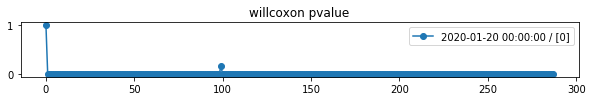

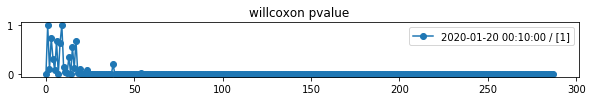

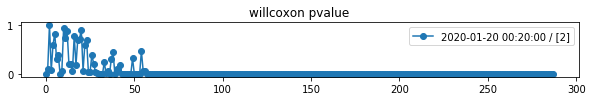

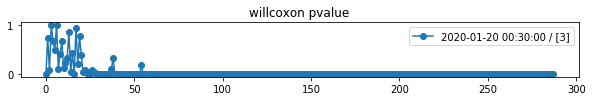

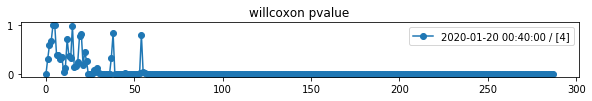

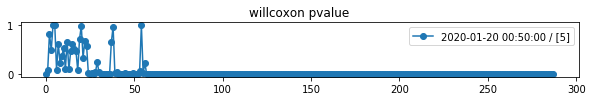

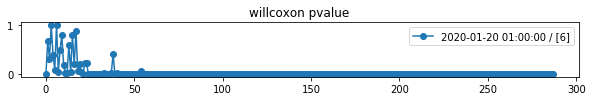

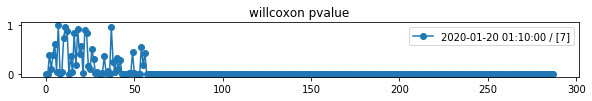

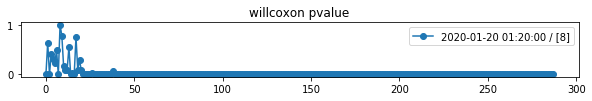

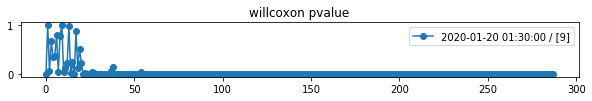

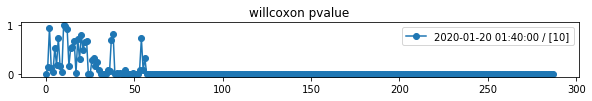

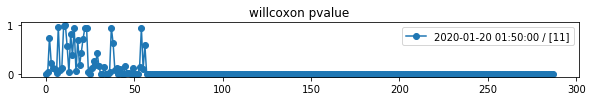

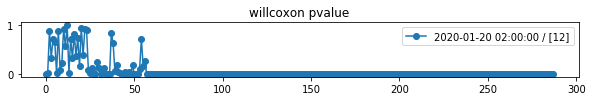

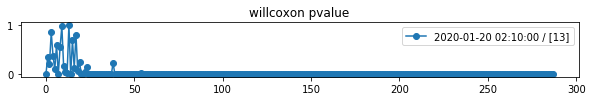

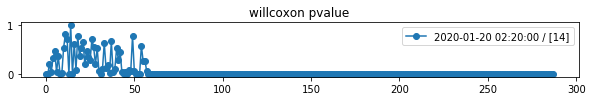

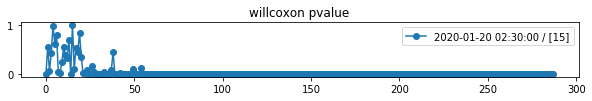

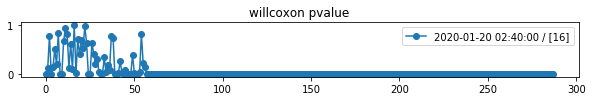

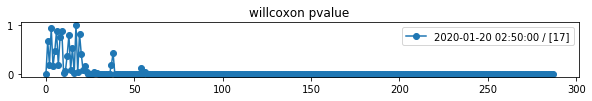

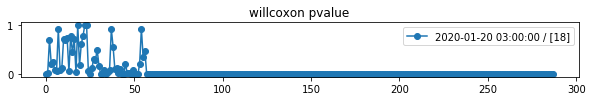

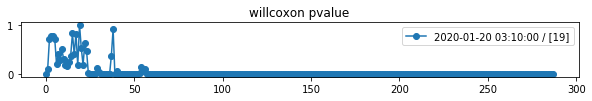

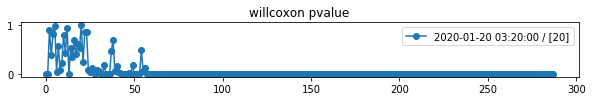

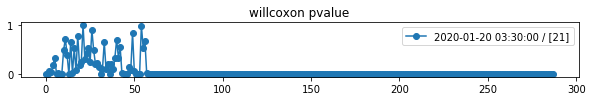

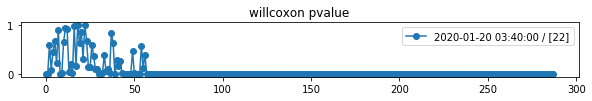

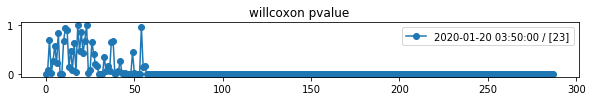

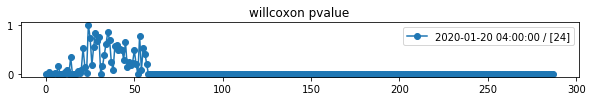

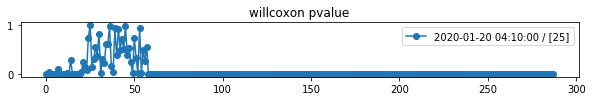

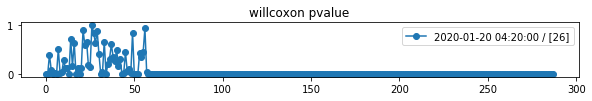

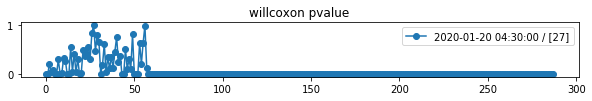

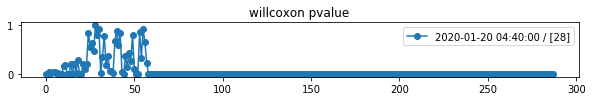

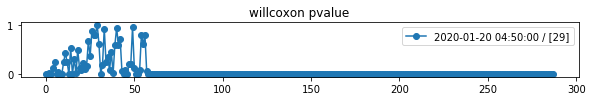

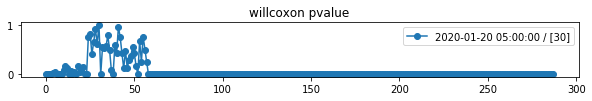

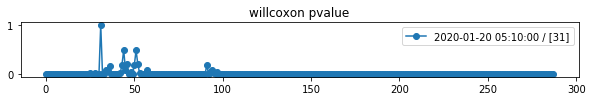

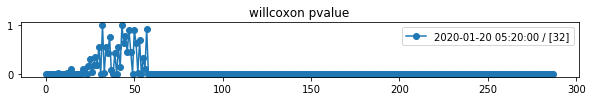

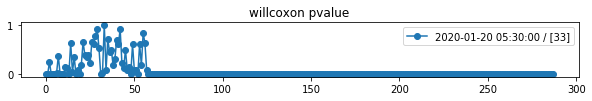

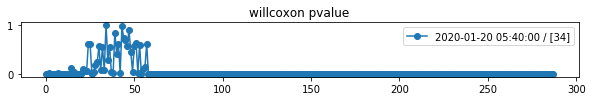

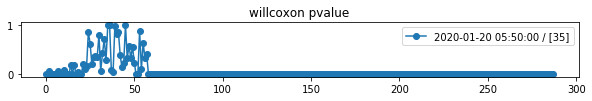

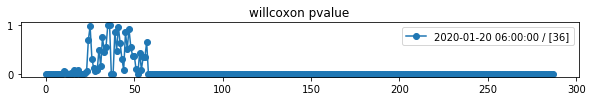

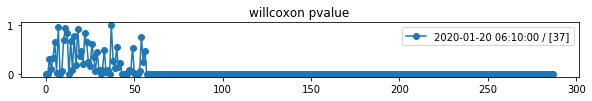

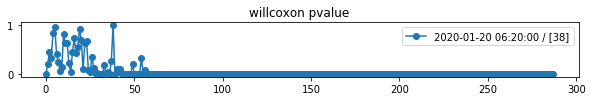

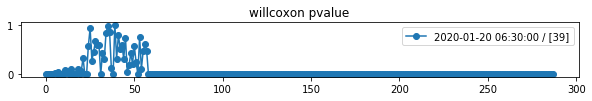

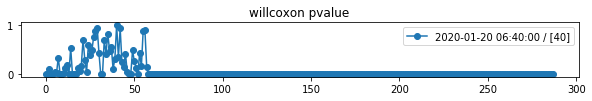

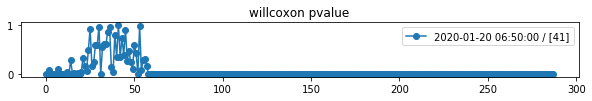

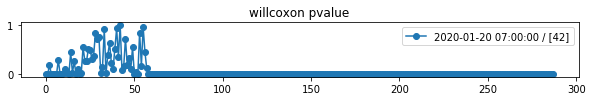

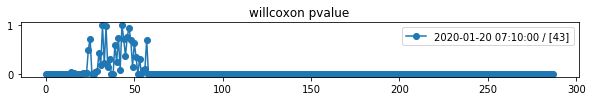

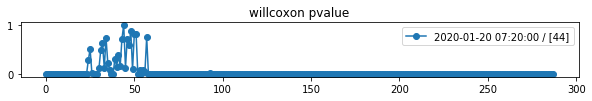

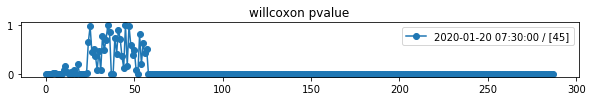

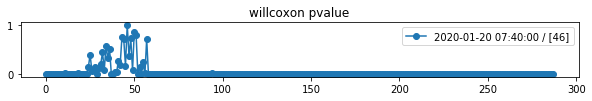

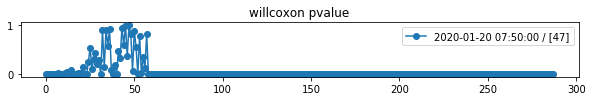

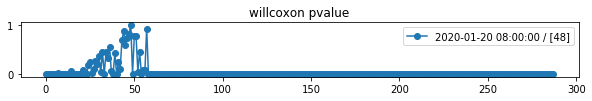

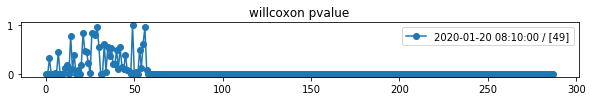

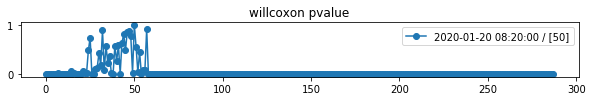

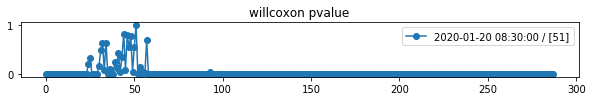

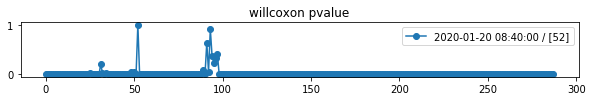

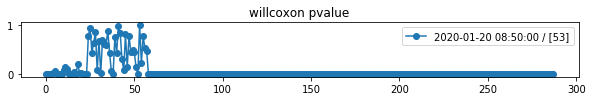

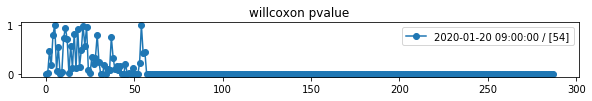

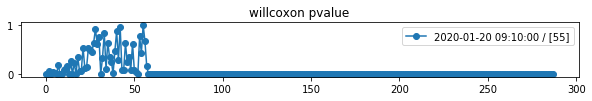

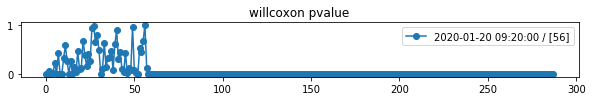

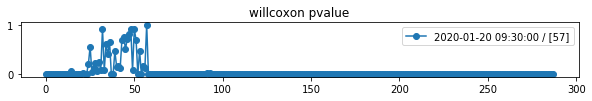

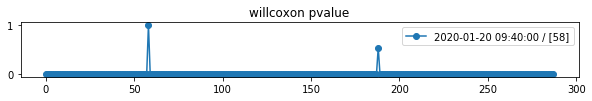

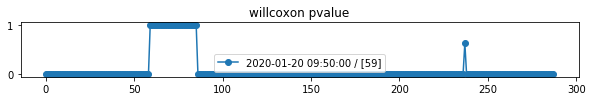

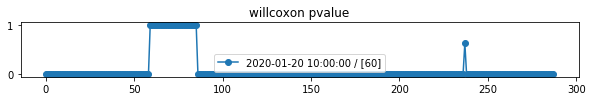

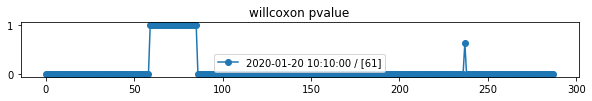

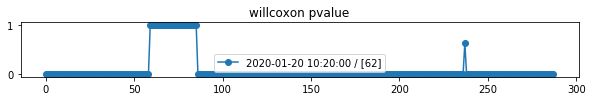

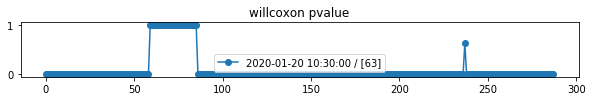

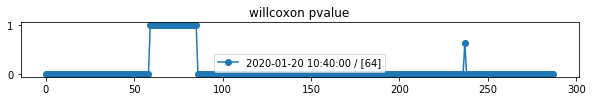

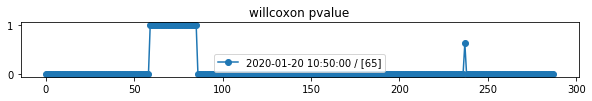

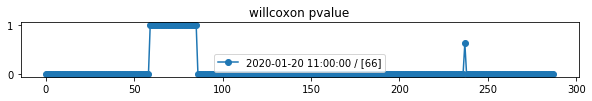

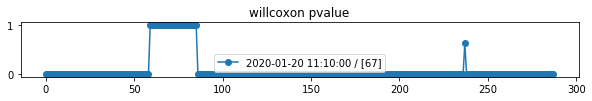

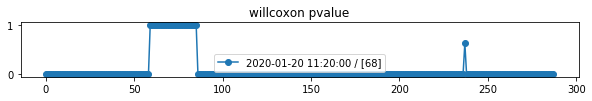

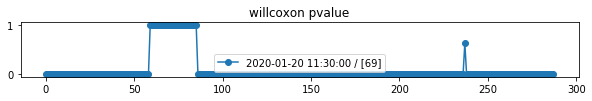

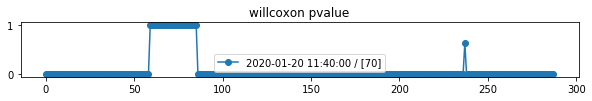

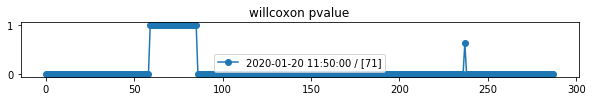

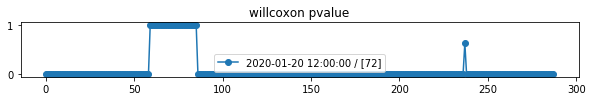

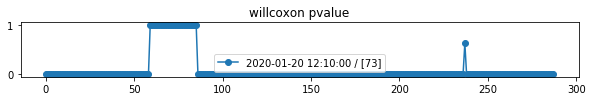

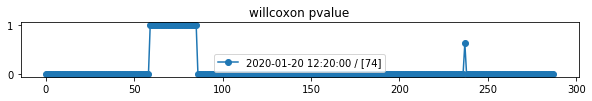

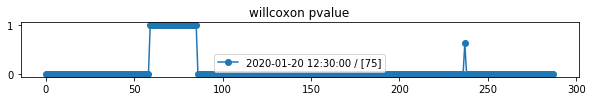

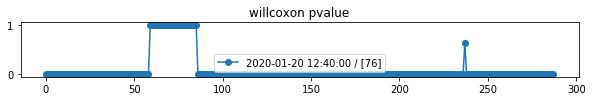

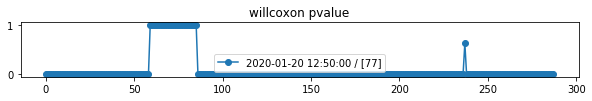

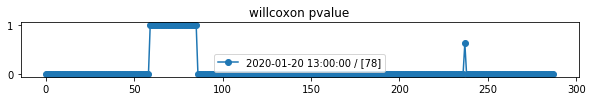

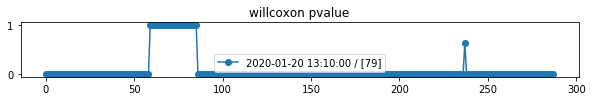

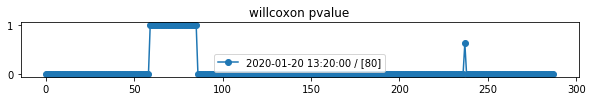

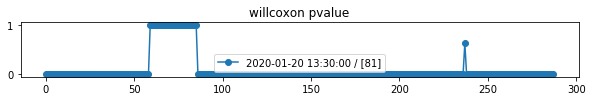

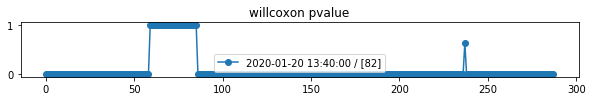

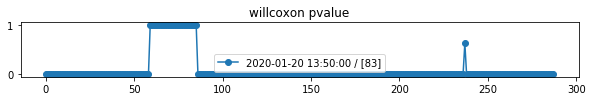

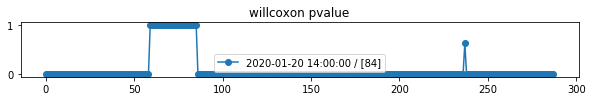

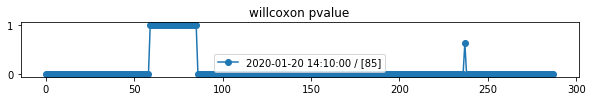

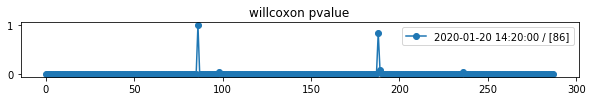

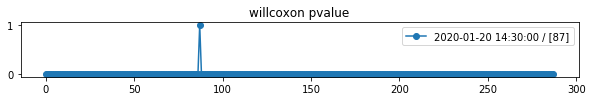

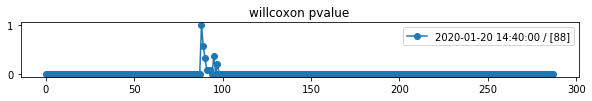

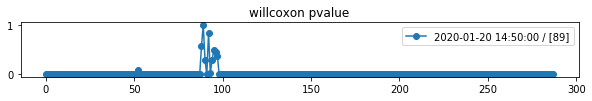

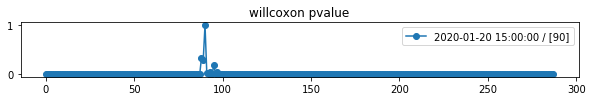

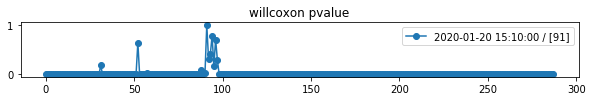

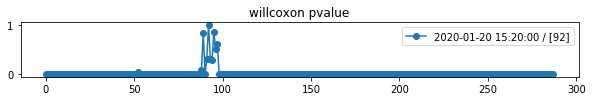

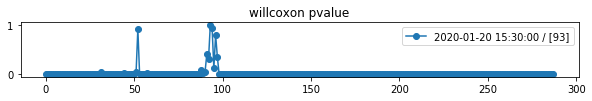

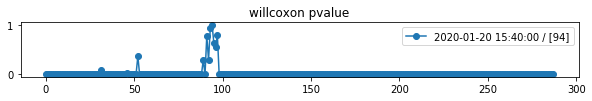

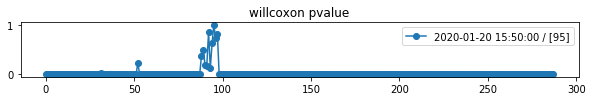

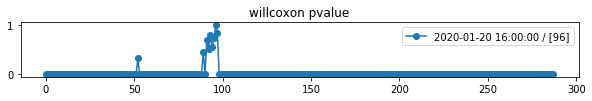

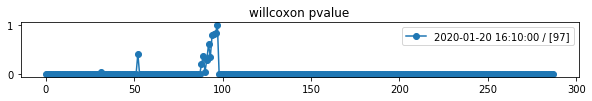

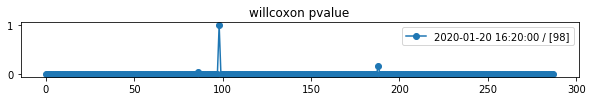

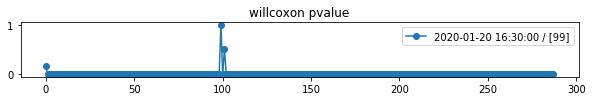

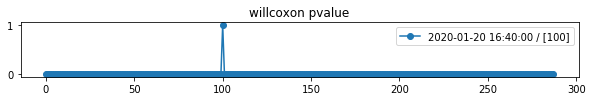

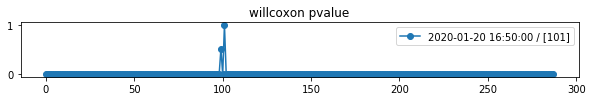

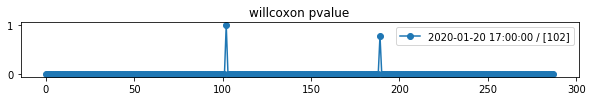

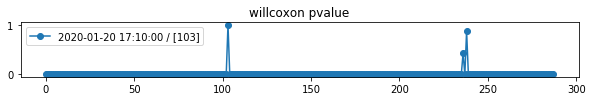

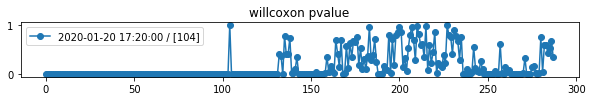

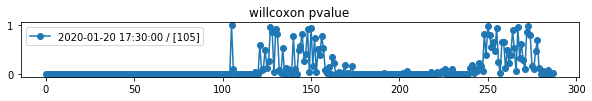

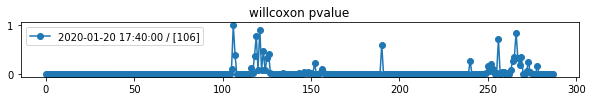

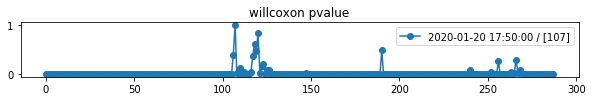

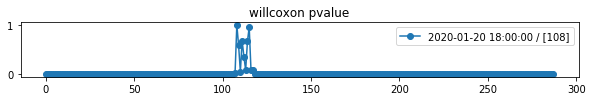

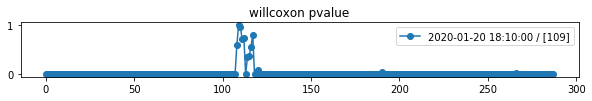

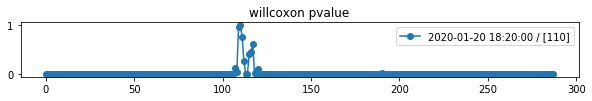

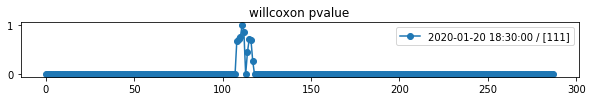

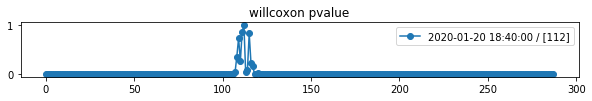

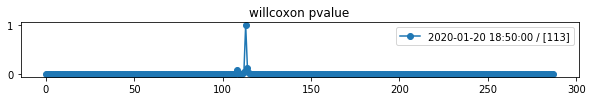

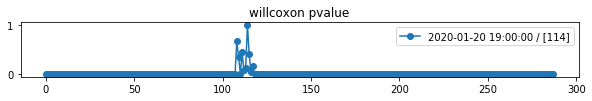

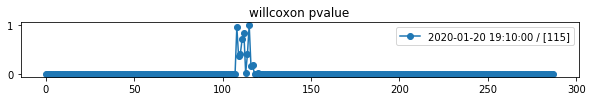

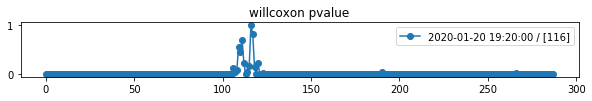

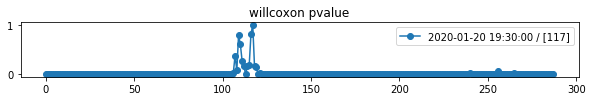

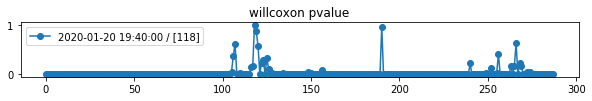

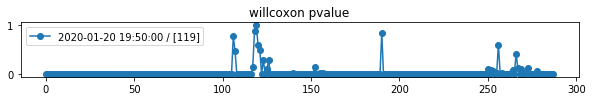

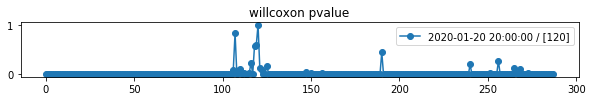

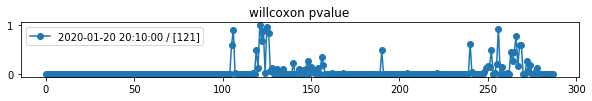

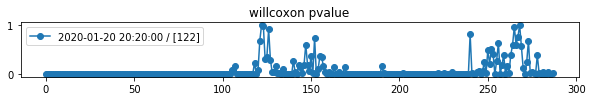

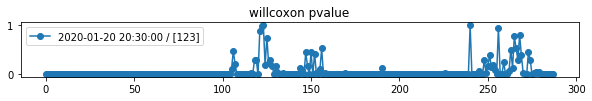

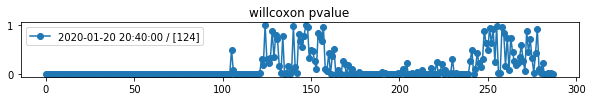

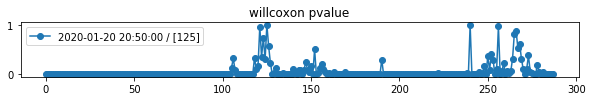

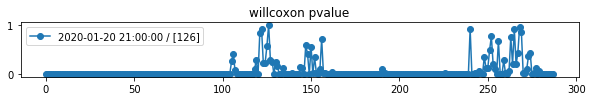

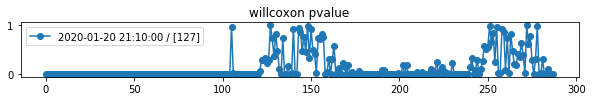

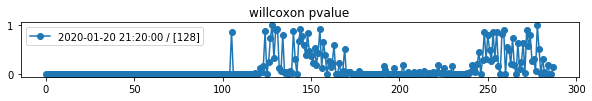

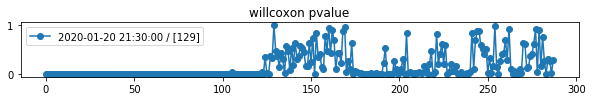

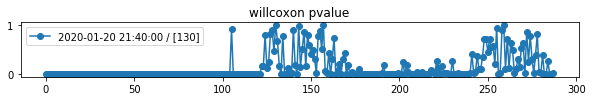

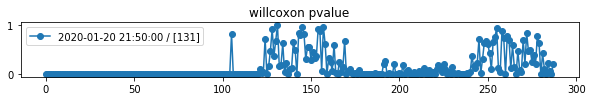

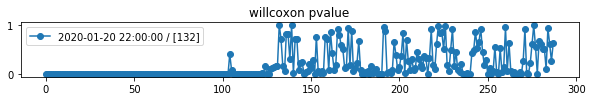

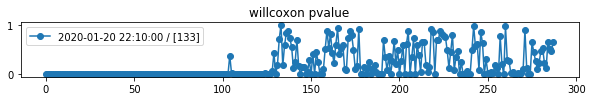

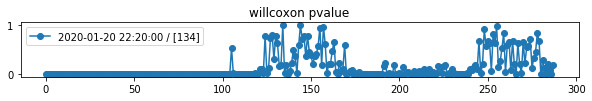

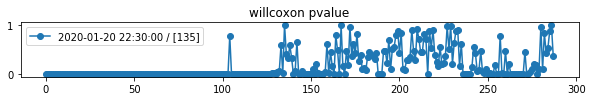

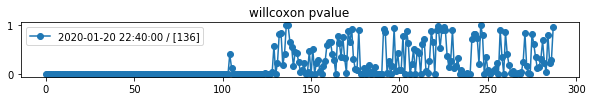

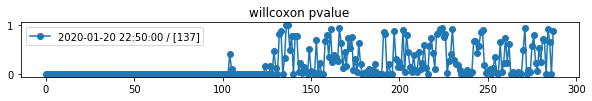

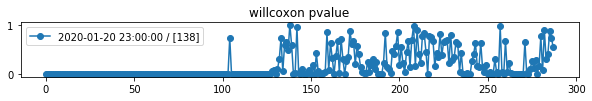

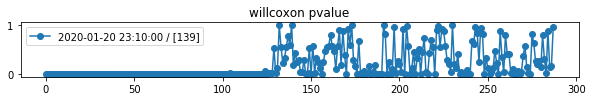

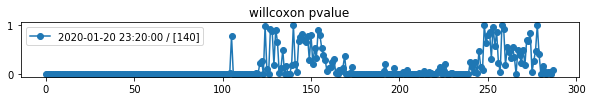

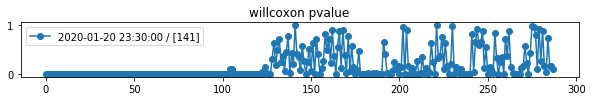

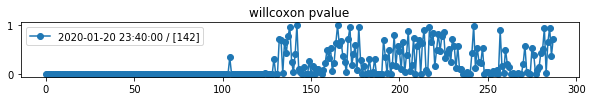

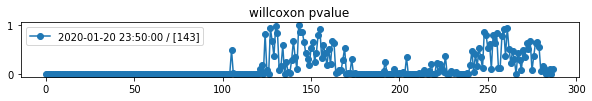

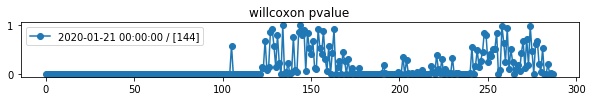

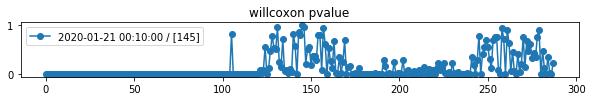

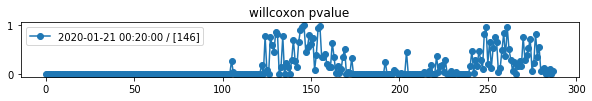

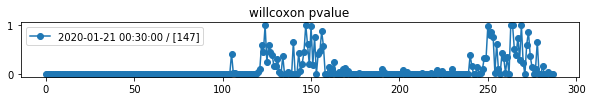

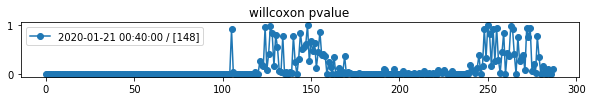

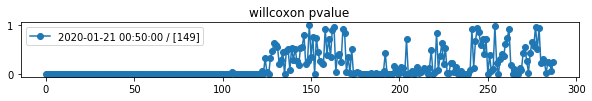

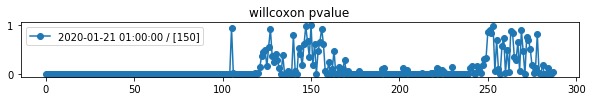

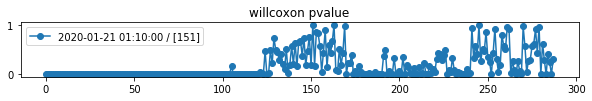

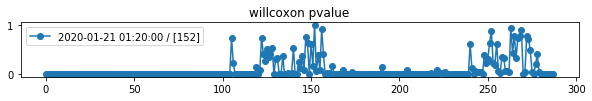

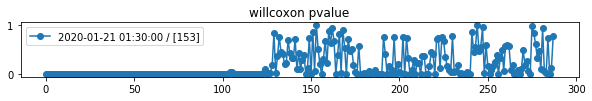

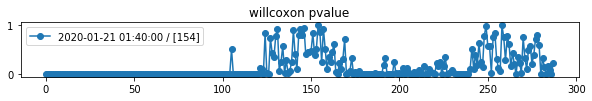

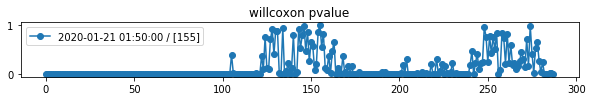

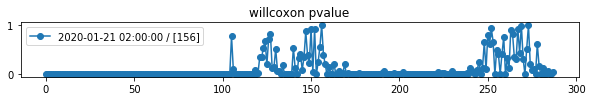

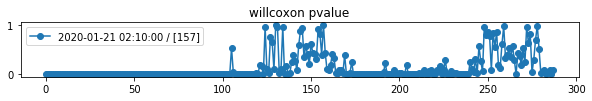

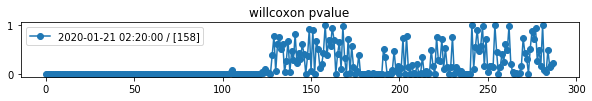

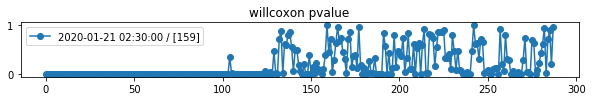

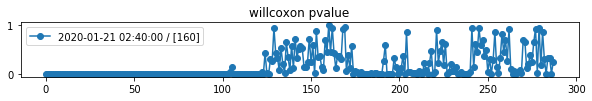

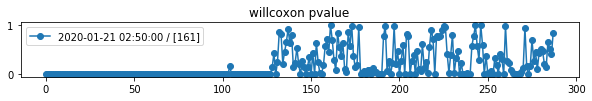

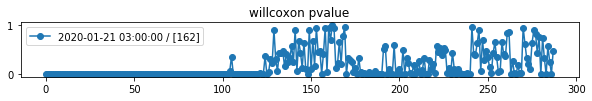

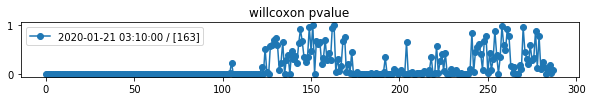

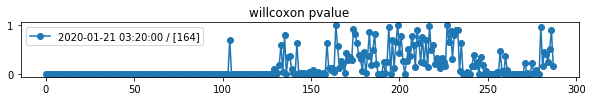

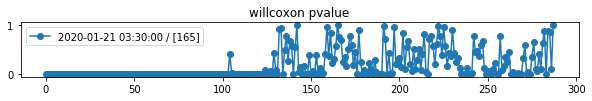

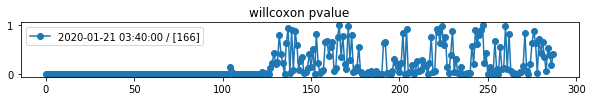

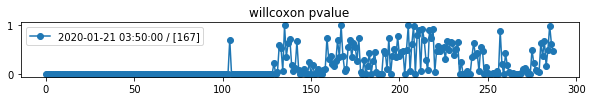

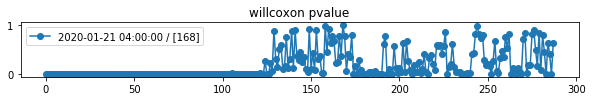

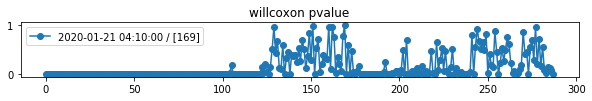

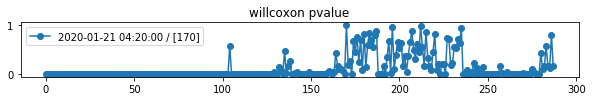

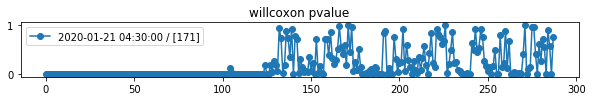

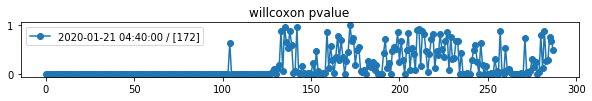

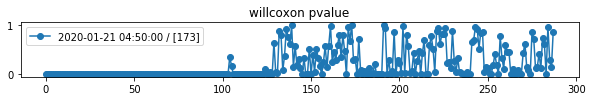

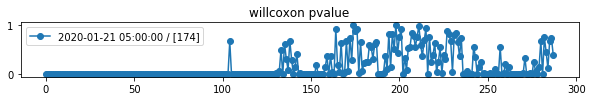

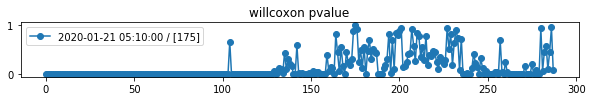

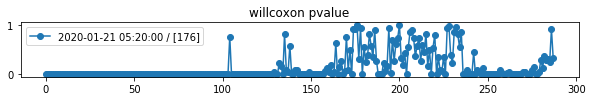

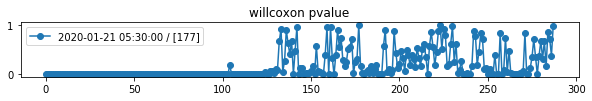

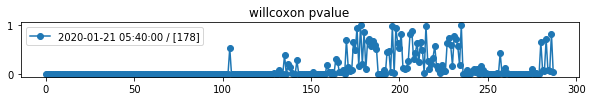

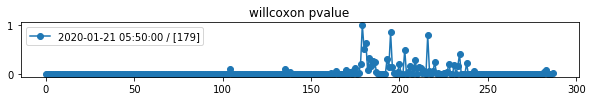

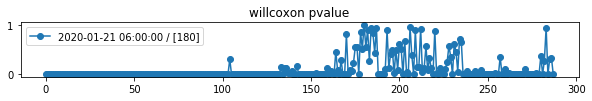

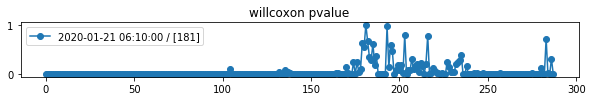

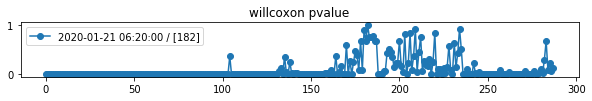

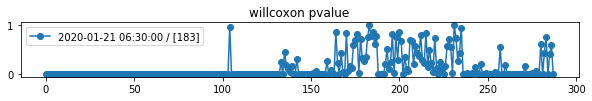

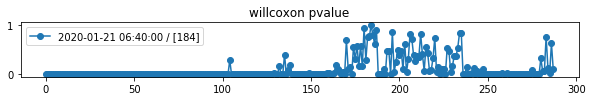

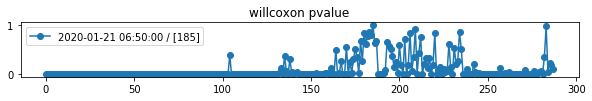

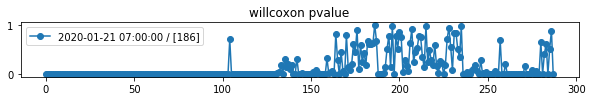

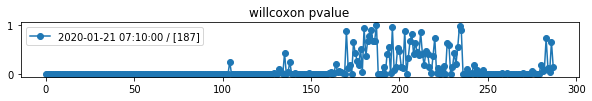

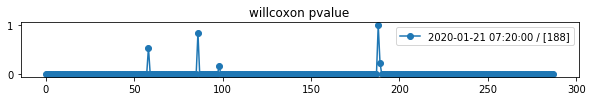

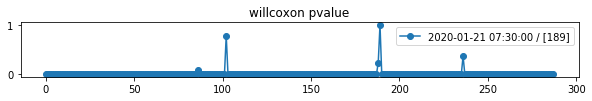

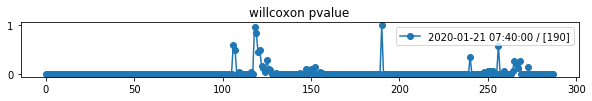

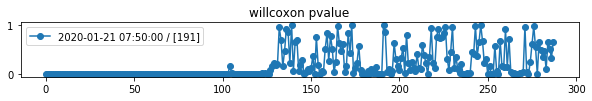

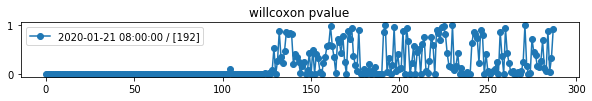

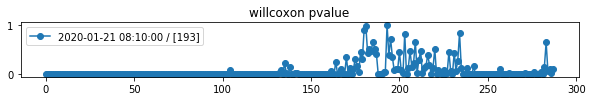

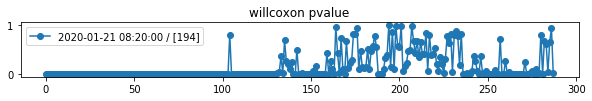

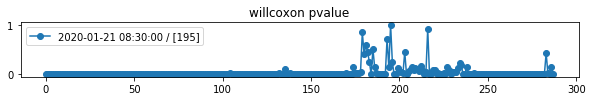

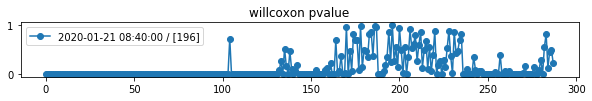

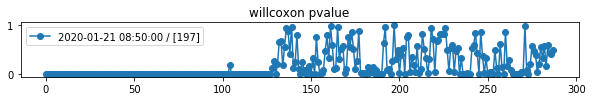

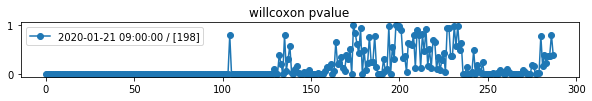

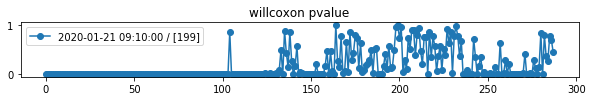

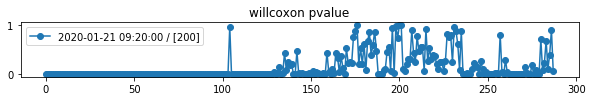

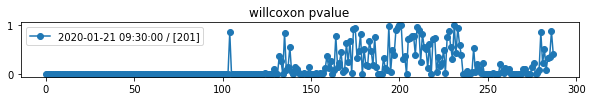

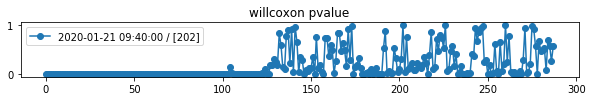

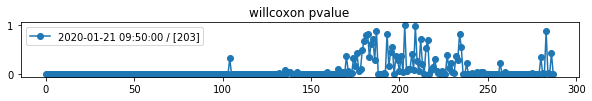

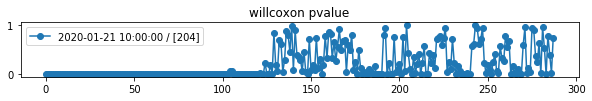

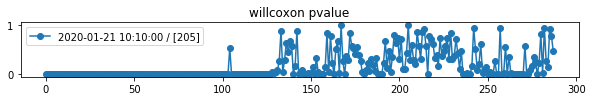

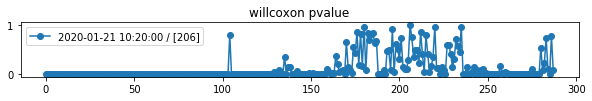

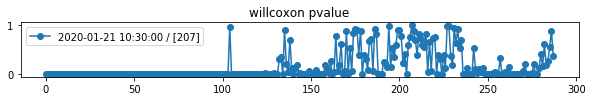

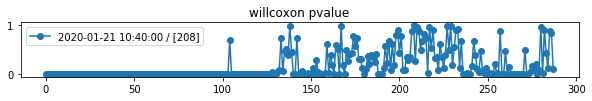

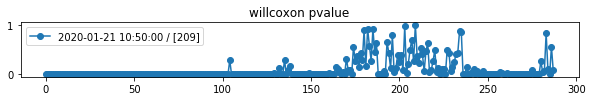

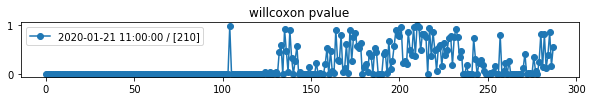

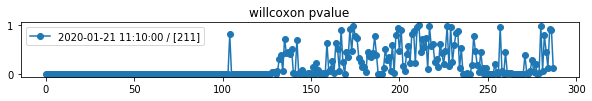

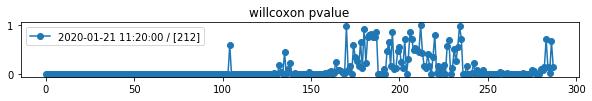

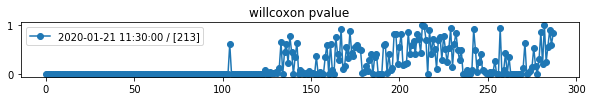

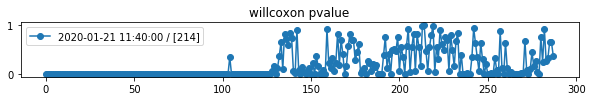

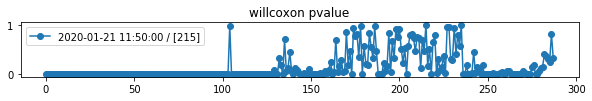

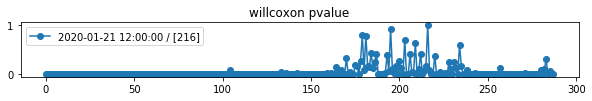

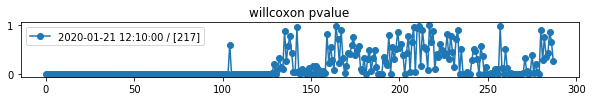

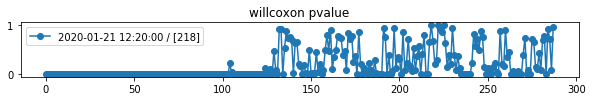

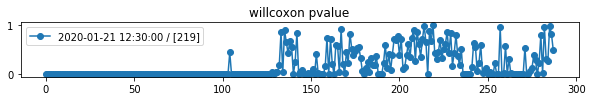

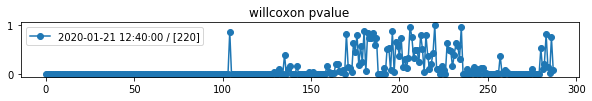

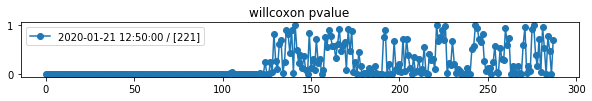

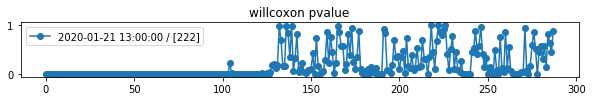

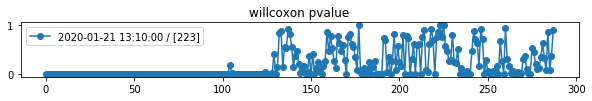

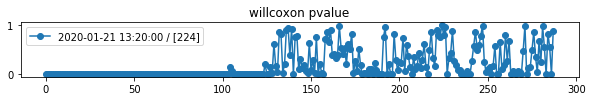

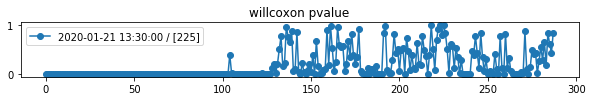

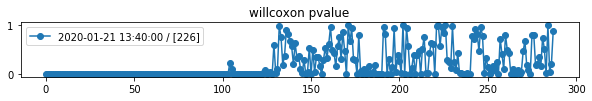

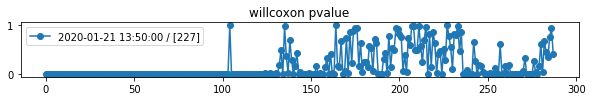

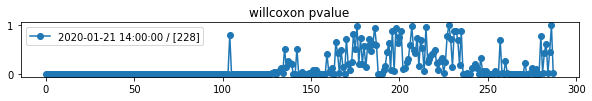

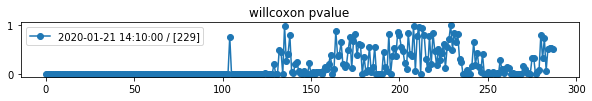

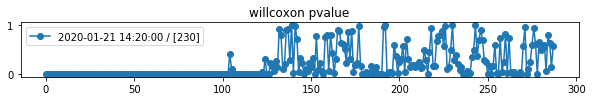

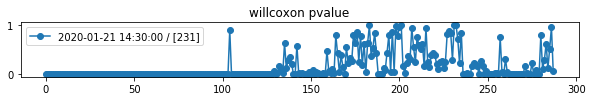

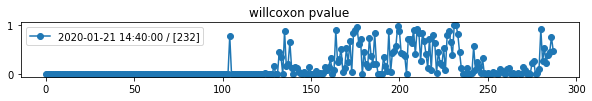

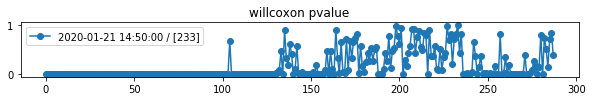

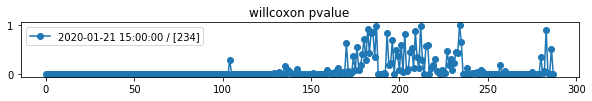

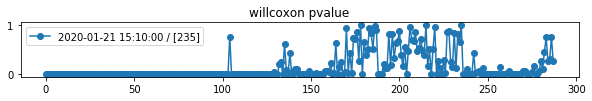

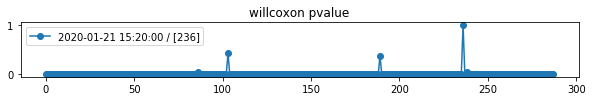

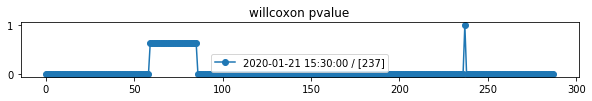

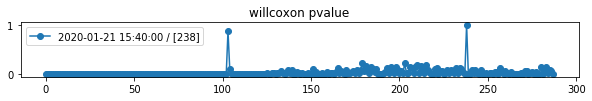

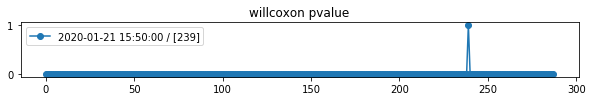

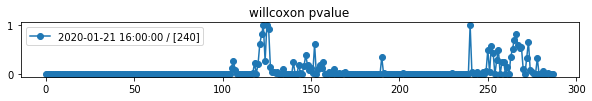

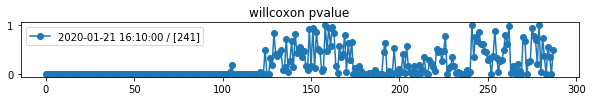

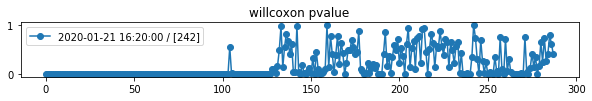

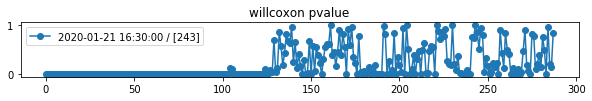

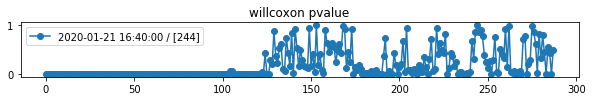

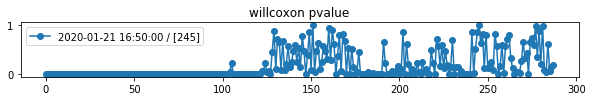

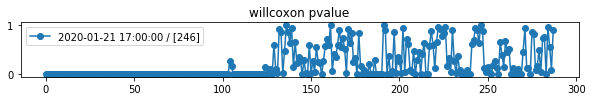

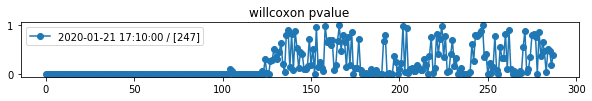

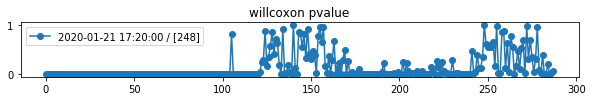

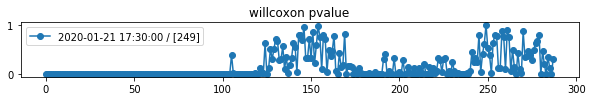

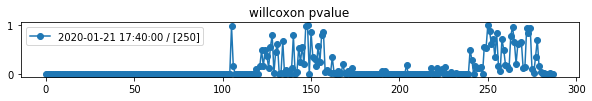

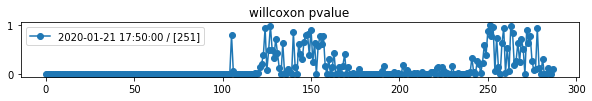

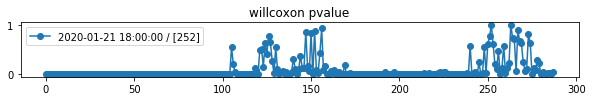

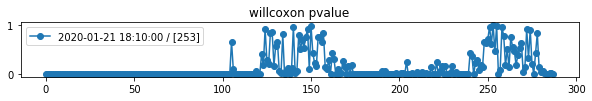

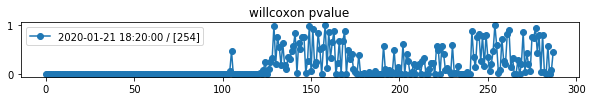

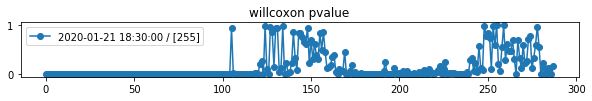

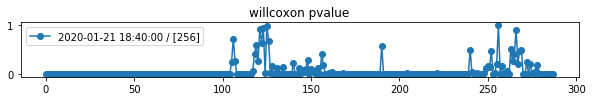

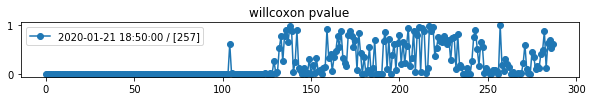

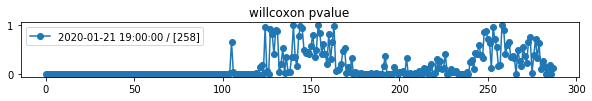

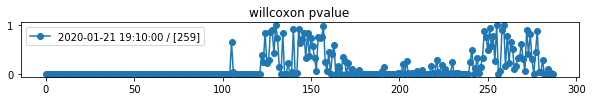

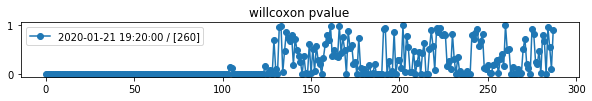

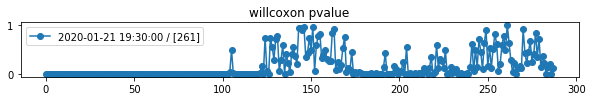

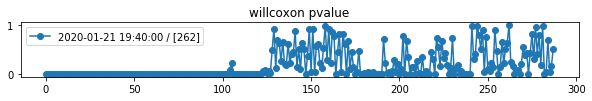

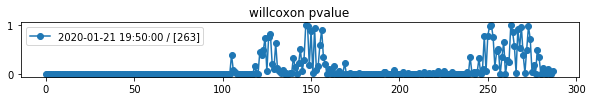

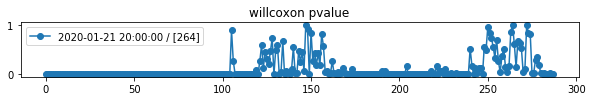

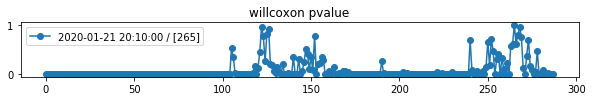

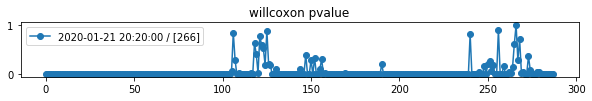

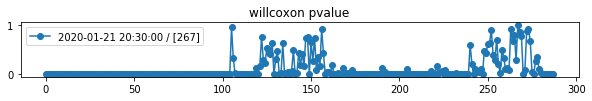

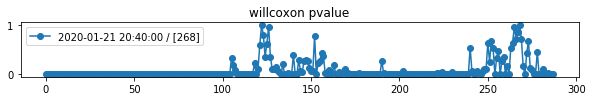

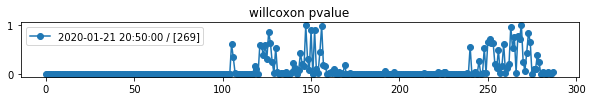

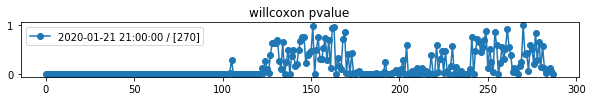

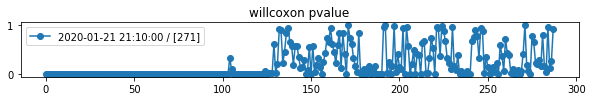

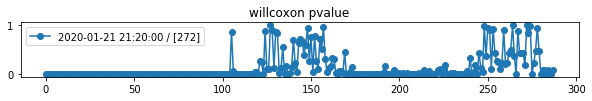

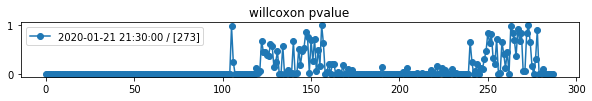

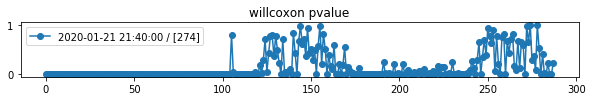

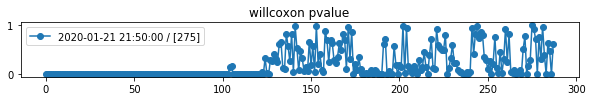

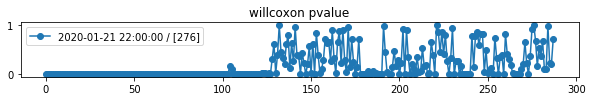

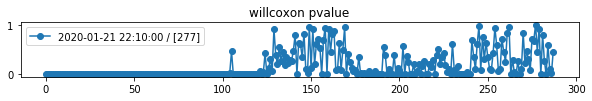

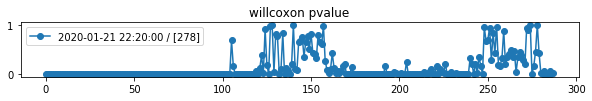

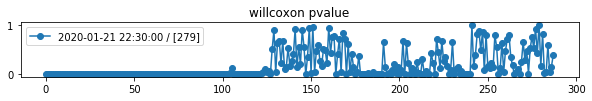

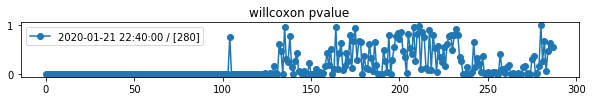

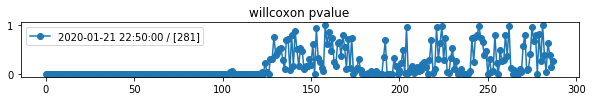

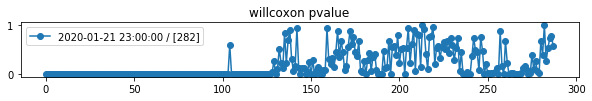

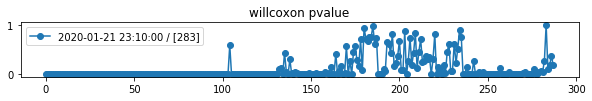

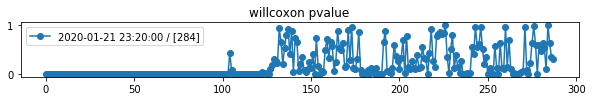

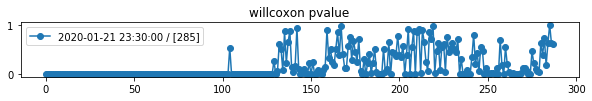

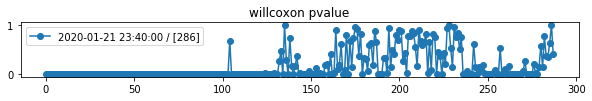

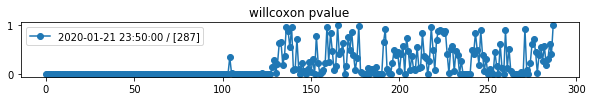

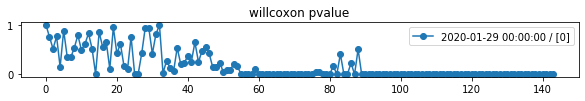

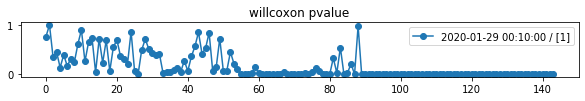

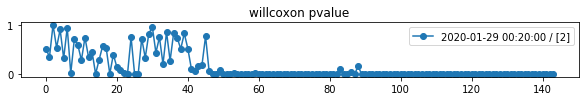

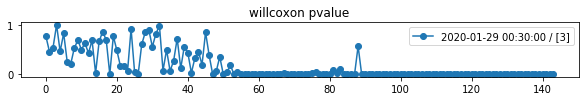

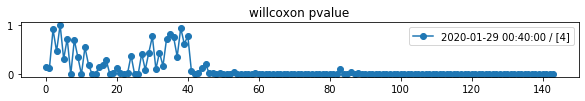

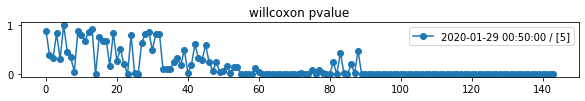

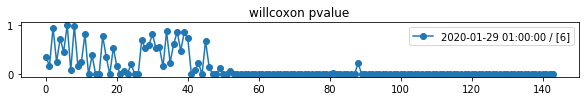

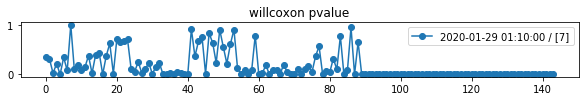

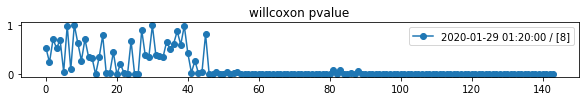

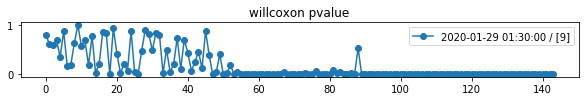

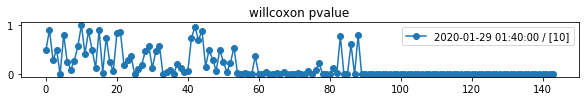

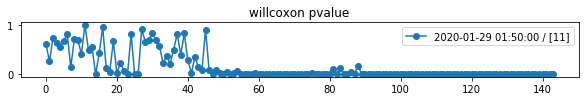

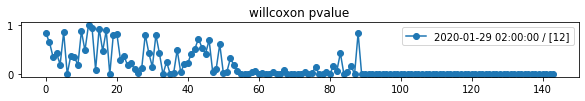

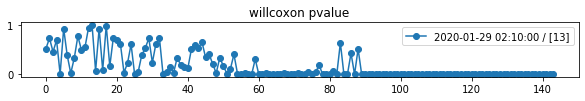

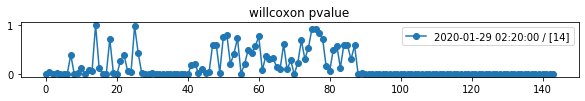

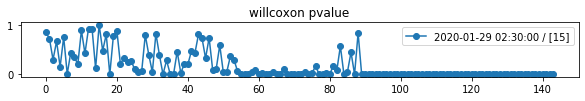

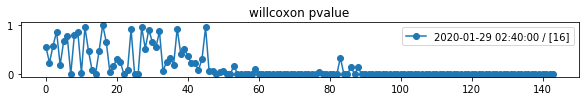

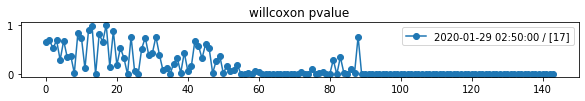

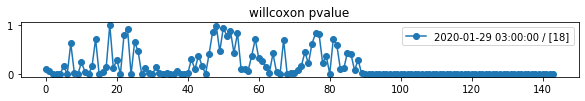

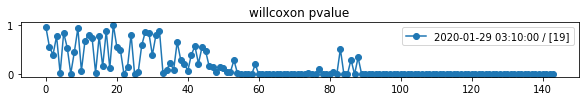

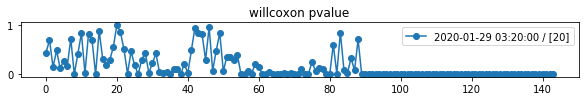

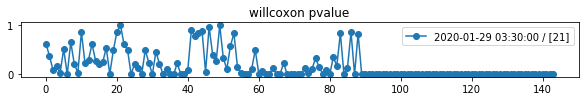

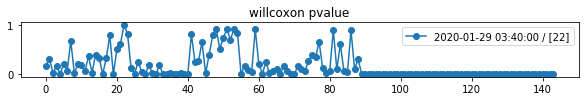

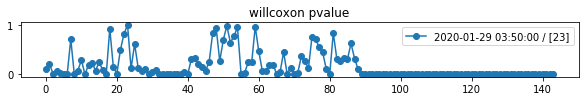

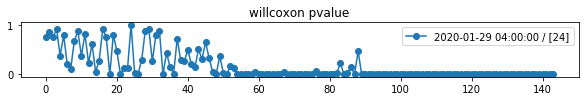

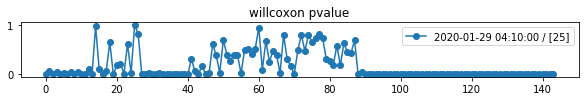

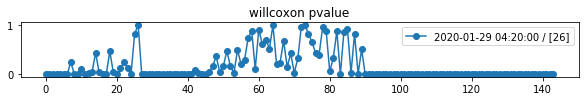

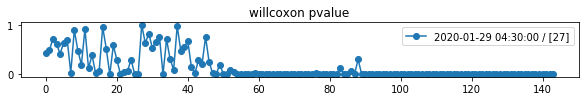

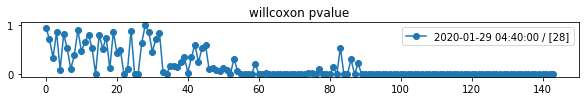

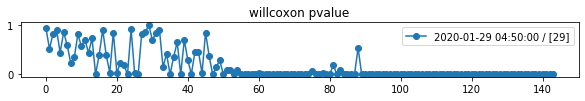

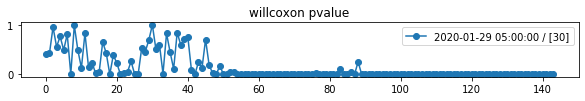

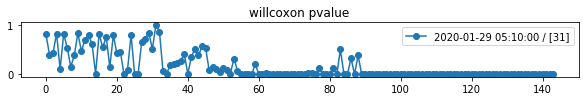

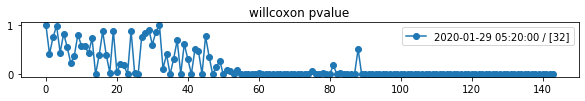

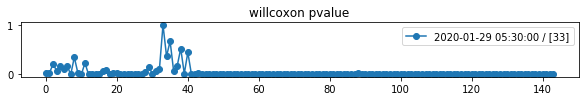

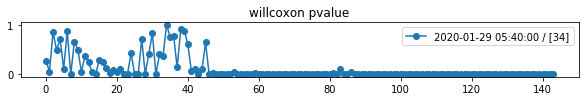

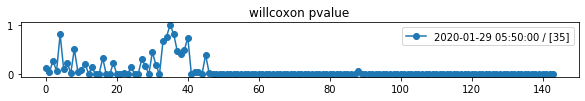

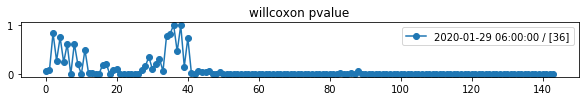

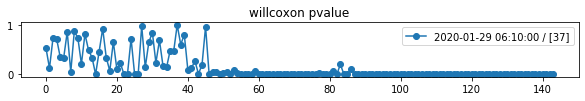

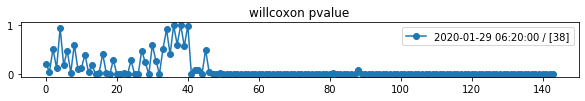

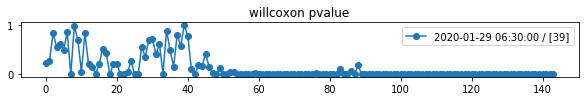

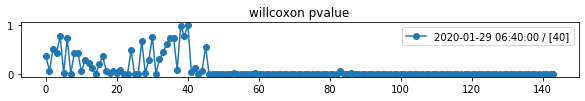

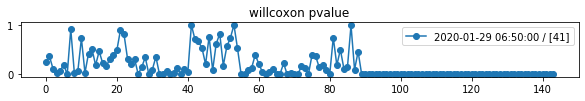

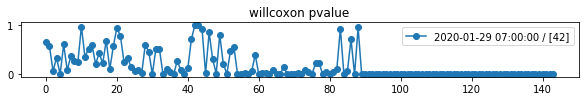

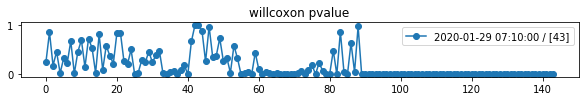

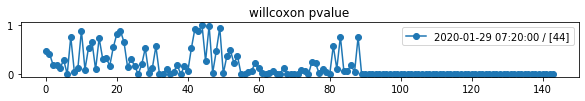

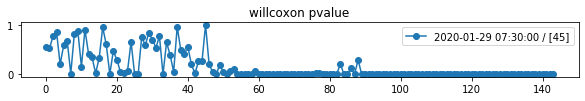

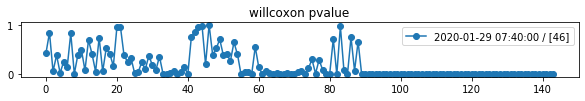

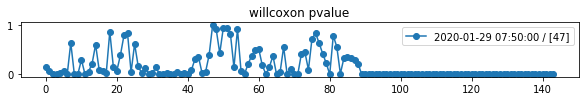

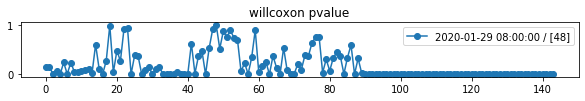

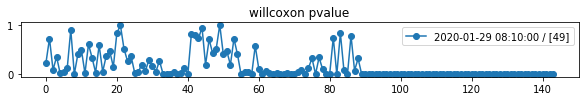

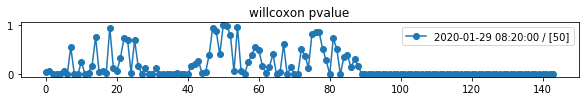

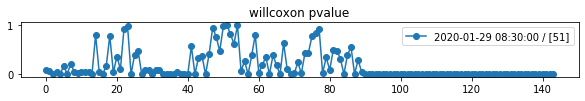

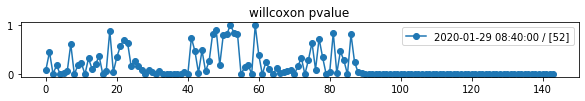

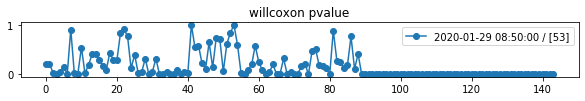

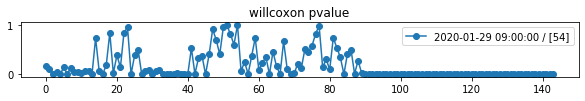

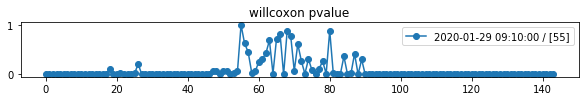

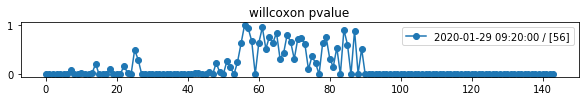

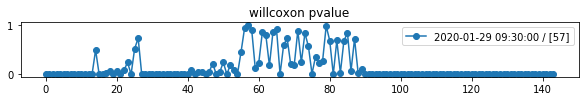

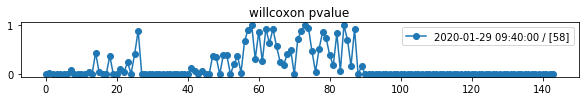

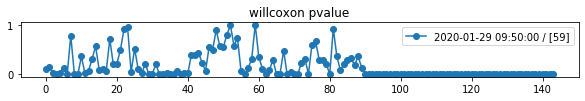

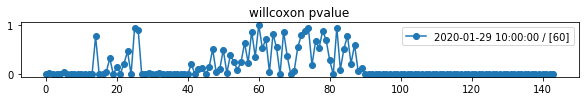

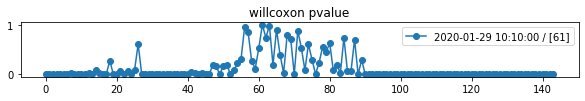

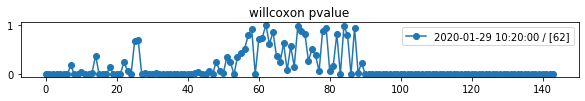

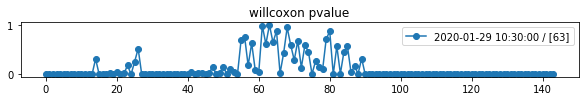

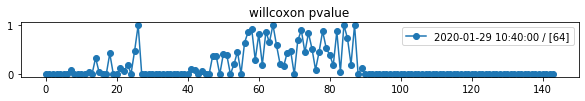

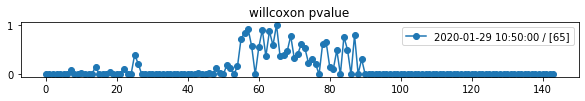

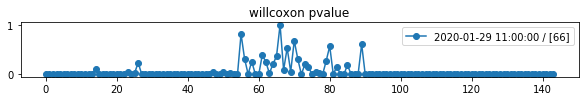

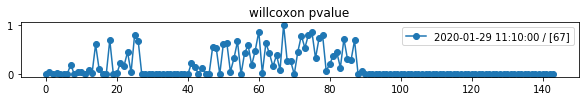

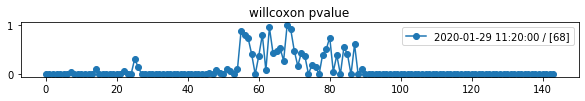

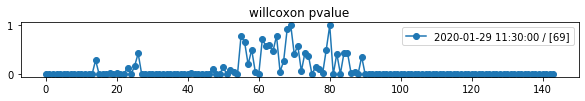

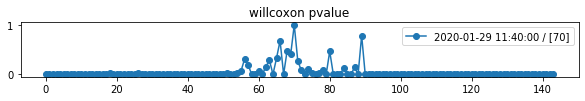

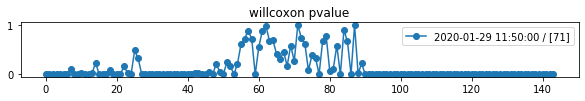

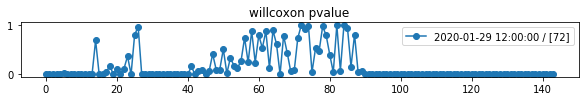

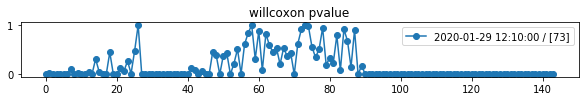

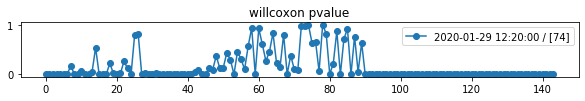

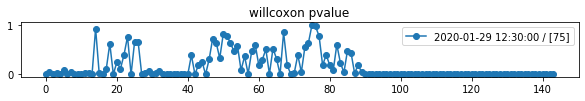

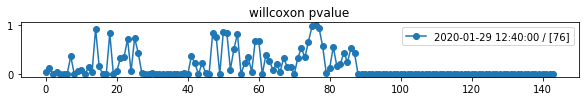

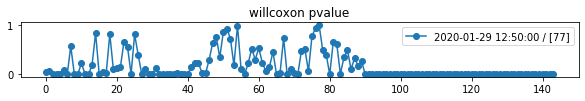

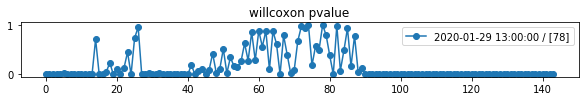

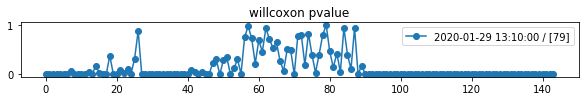

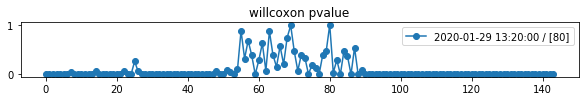

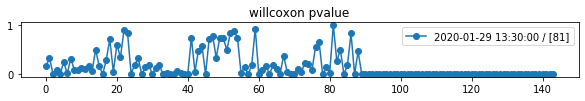

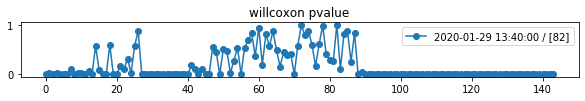

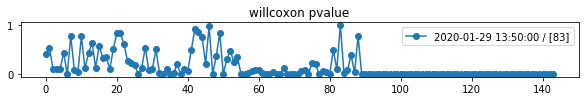

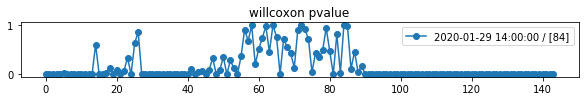

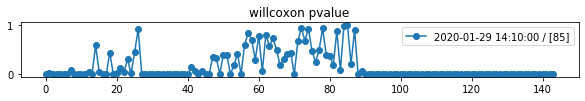

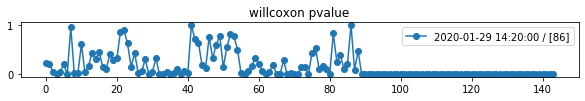

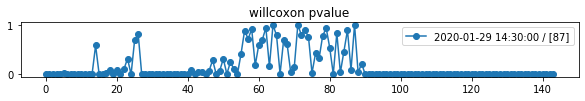

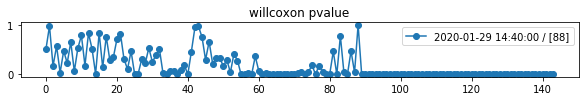

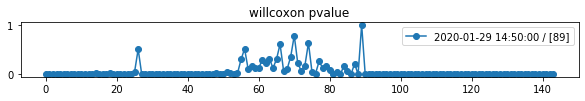

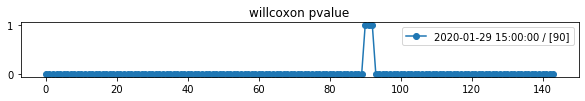

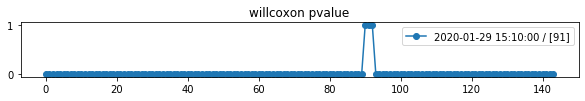

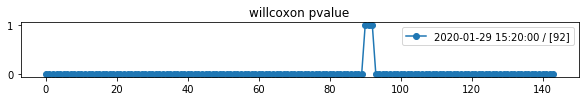

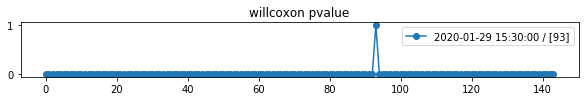

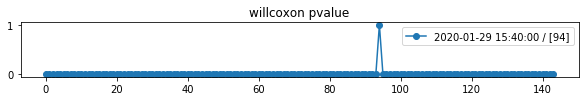

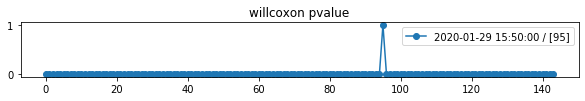

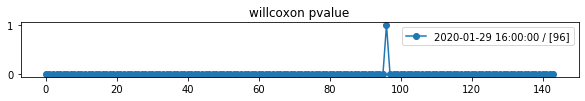

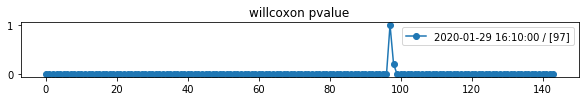

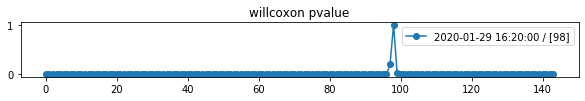

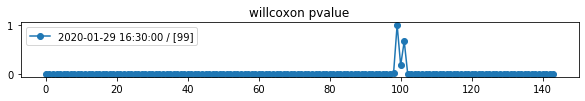

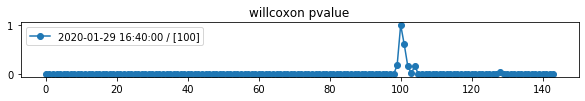

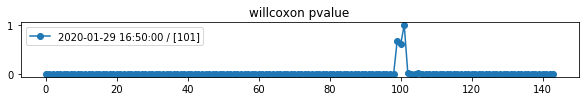

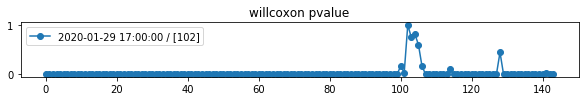

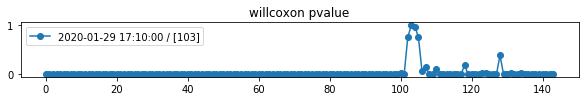

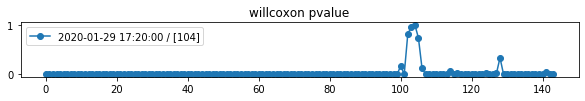

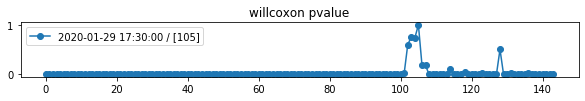

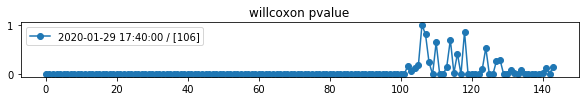

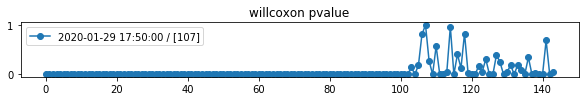

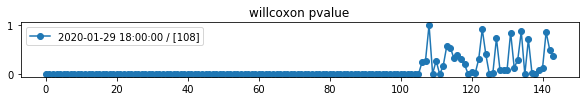

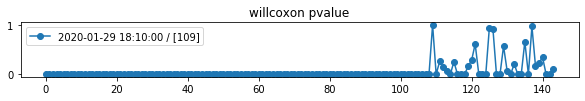

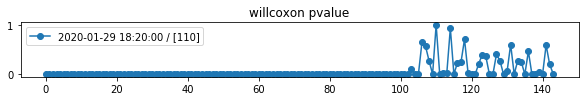

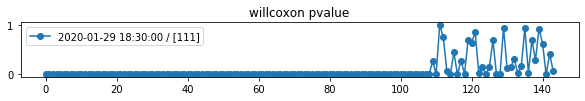

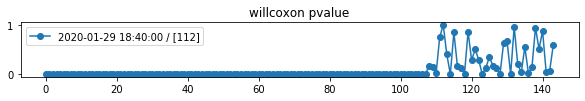

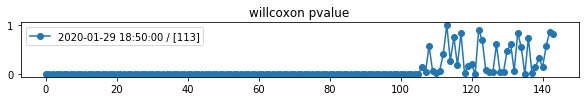

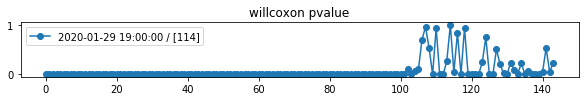

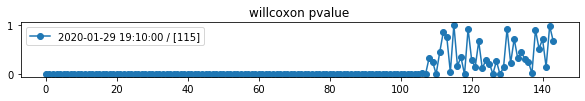

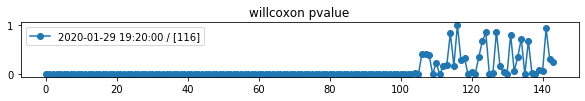

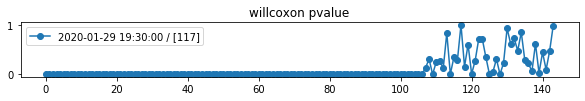

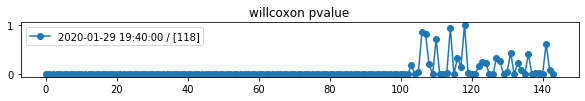

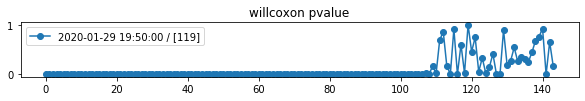

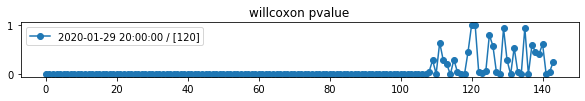

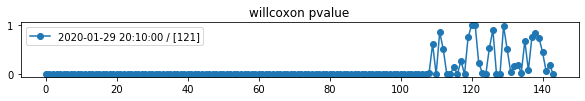

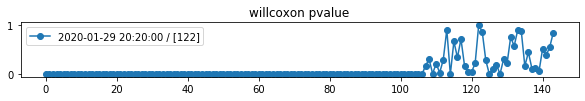

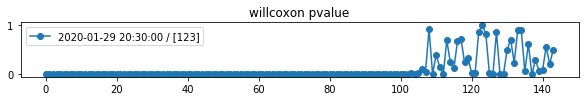

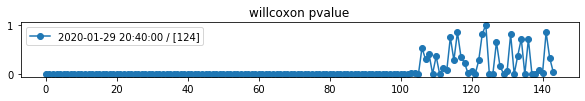

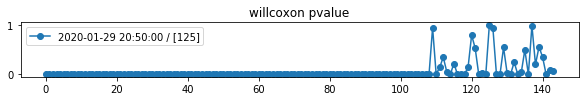

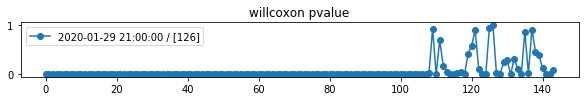

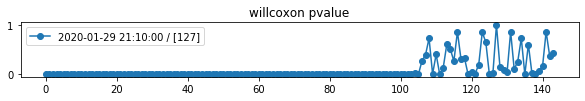

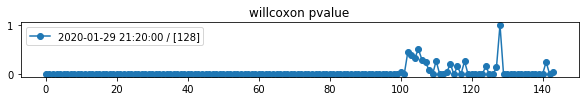

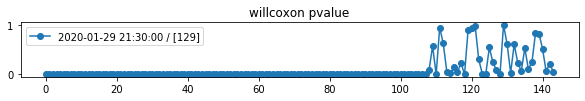

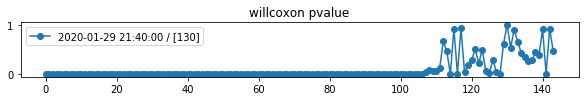

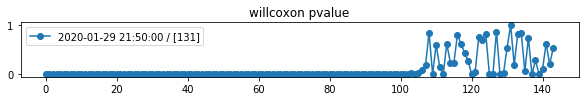

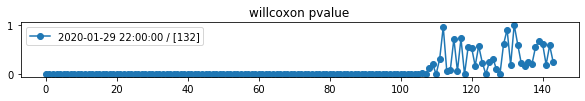

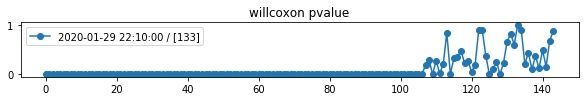

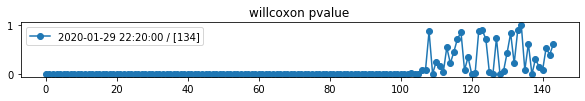

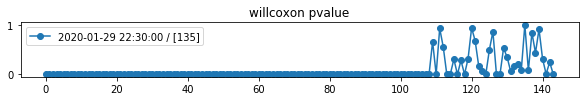

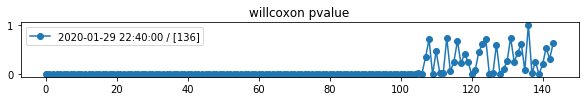

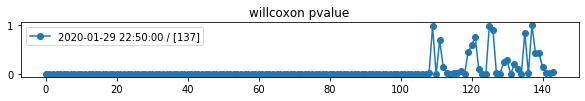

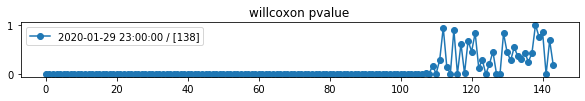

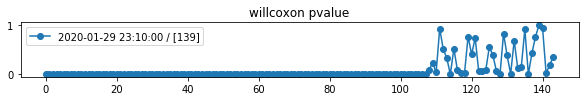

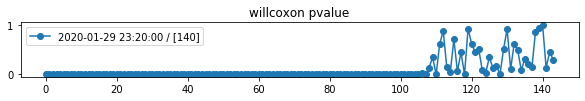

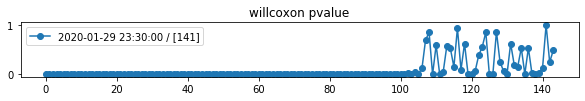

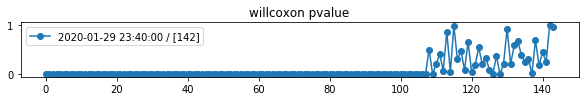

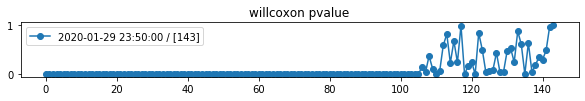

In [162]:
for i in range(len(STS_DATE)):
    for j in range(len(STS_DATE[i])):
        plt.figure(figsize= ([10,1]))
        plt.plot(U[i][j], marker = 'o', label = "{} / {}".format(PERIOD[i][j],[j]))
        plt.legend()
        plt.title('willcoxon pvalue')
        plt.show()

In [60]:
turn = 1
for i, data in enumerate(DATA):
    HOUR = data
    plt.figure(figsize = [25,4])
    for k in range(0,23,turn):
        plt.hist(HOUR[k]['amp_65']+4*k, bins = 250, color = 'b',alpha = 0.2, density = False, range = (40,140))
        plt.ylim(0,1000)
        plt.title(SELECT_DATE[i])
    plt.show()

TypeError: 'int' object is not subscriptable

<Figure size 1800x288 with 0 Axes>